<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Logistic_Regression_Ad_Click_Prediction_Classification_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline
import cufflinks as cf 
cf.go_offline()
import plotly.io as pio
pio.renderers.default = 'colab'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preperation and Visualization

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])

In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [8]:
ad_data['Country'].unique()

array(['Tunisia', 'Nauru', 'San Marino', 'Italy', 'Iceland', 'Norway',
       'Myanmar', 'Australia', 'Grenada', 'Ghana', 'Qatar', 'Burundi',
       'Egypt', 'Bosnia and Herzegovina', 'Barbados', 'Spain',
       'Palestinian Territory', 'Afghanistan',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'Russian Federation', 'Cameroon', 'Korea', 'Tokelau', 'Monaco',
       'Tuvalu', 'Greece', 'British Virgin Islands',
       'Bouvet Island (Bouvetoya)', 'Peru', 'Aruba', 'Maldives',
       'Senegal', 'Dominica', 'Luxembourg', 'Montenegro', 'Ukraine',
       'Saint Helena', 'Liberia', 'Turkmenistan', 'Niger', 'Sri Lanka',
       'Trinidad and Tobago', 'United Kingdom', 'Guinea-Bissau',
       'Micronesia', 'Turkey', 'Croatia', 'Israel',
       'Svalbard & Jan Mayen Islands', 'Azerbaijan', 'Iran',
       'Saint Vincent and the Grenadines', 'Bulgaria', 'Christmas Island',
       'Canada', 'Rwanda', 'Turks and Caicos Islands', 'Norfolk Island',
       'Cook Islands', 'Guatem

In [9]:
sns.set_style('whitegrid')

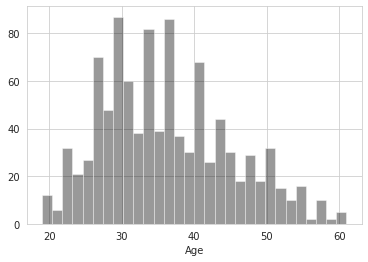

In [10]:
sns.distplot(ad_data['Age'],kde=False,bins=30,color='black')

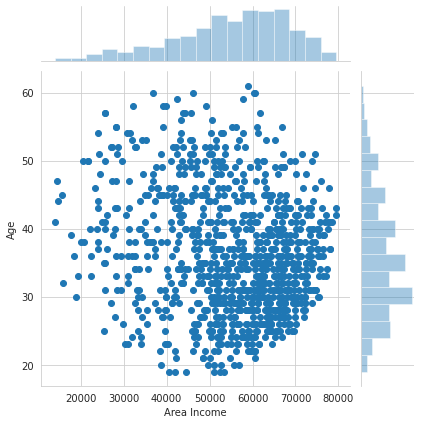

In [11]:
sns.jointplot(x='Area Income',y='Age',data=ad_data)

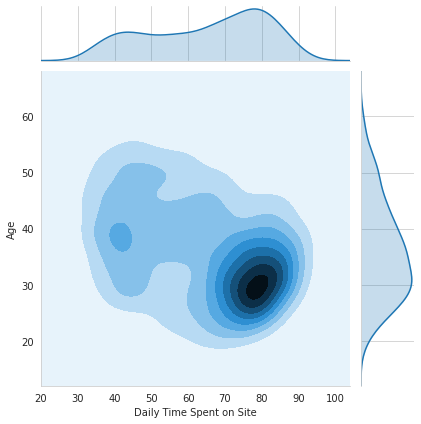

In [12]:
sns.jointplot(x='Daily Time Spent on Site',y='Age',data=ad_data,kind='kde')

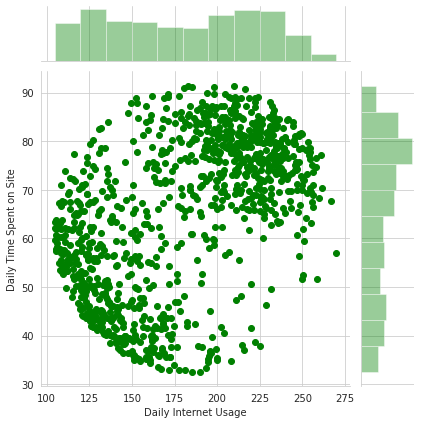

In [13]:
sns.jointplot(x='Daily Internet Usage',y='Daily Time Spent on Site',data=ad_data,color='green')

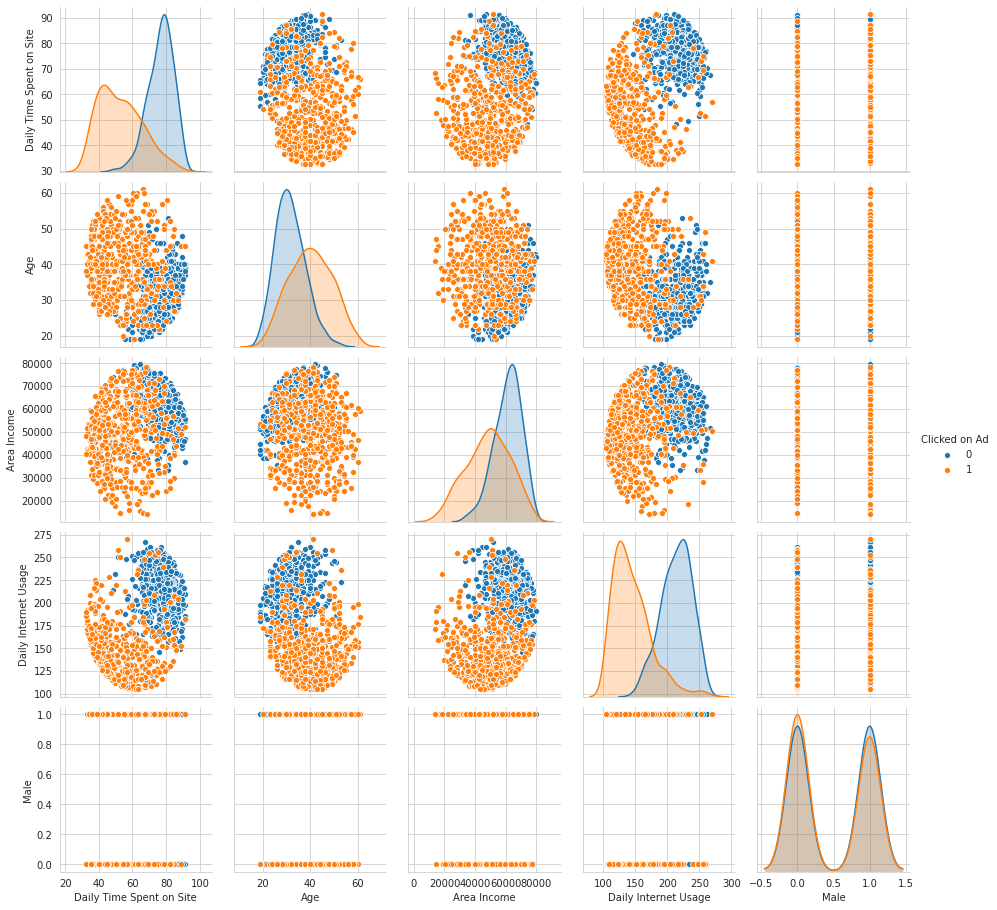

In [14]:
sns.pairplot(ad_data,hue='Clicked on Ad')

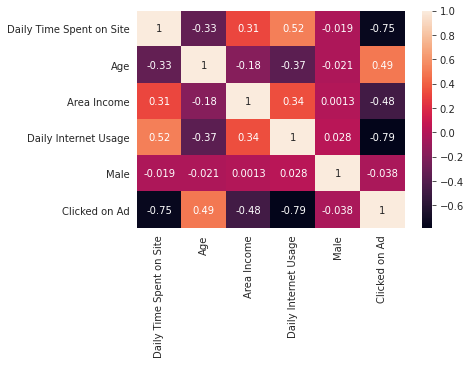

In [15]:
sns.heatmap(ad_data.corr(),annot=True)

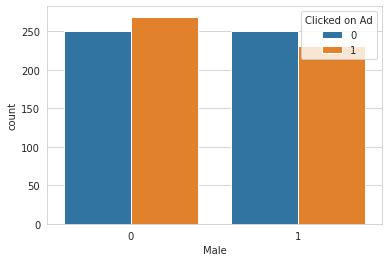

In [16]:
sns.countplot(x='Male',data=ad_data,hue='Clicked on Ad')

## Creating new columns from data

In [17]:
ad_data['Hour'] = ad_data['Timestamp'].dt.hour

In [18]:
ad_data['AMorPM'] = np.where(ad_data['Hour']<12,'am','pm')

In [19]:
ad_data['Weekday'] = ad_data['Timestamp'].dt.strftime('%a')

In [20]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,AMorPM,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,am,Sun
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,am,Mon
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,pm,Sun
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,am,Sun
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,am,Fri


## Getting dummy variables

In [21]:
PM_AM = pd.get_dummies(ad_data['AMorPM'],drop_first=True)

In [22]:
PM_AM.head()

,pm
0,0
1,0
2,1
3,0
4,0


In [23]:
Week = pd.get_dummies(ad_data['Weekday'],drop_first=True)

In [24]:
Sunday = Week['Sun']

In [25]:
Sunday.head()

0    1
1    0
2    1
3    1
4    0
Name: Sun, dtype: uint8

In [26]:
ad_data = pd.concat([ad_data,Sunday,PM_AM],axis=1)

In [27]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,AMorPM,Weekday,Sun,pm
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,am,Sun,1,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,am,Mon,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,pm,Sun,1,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,am,Sun,1,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,am,Fri,0,0


In [28]:
ad_data.drop(['Ad Topic Line','City','Country','Timestamp','Weekday'],axis=1,inplace=True)

In [29]:
ad_data.drop(['AMorPM'],axis=1,inplace=True)

In [30]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,Sun,pm
0,68.95,35,61833.90,256.09,0,0,0,1,0
1,80.23,31,68441.85,193.77,1,0,1,0,0
2,69.47,26,59785.94,236.50,0,0,20,1,1
3,74.15,29,54806.18,245.89,1,0,2,1,0
4,68.37,35,73889.99,225.58,0,0,3,0,0


In [31]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'Hour', 'Sun', 'pm'],
      dtype='object')

## Logistic Regression

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
df = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']]

In [35]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
df = scaler.transform(df)

In [37]:
df

array([[ 0.24926659, -0.11490498,  0.50969109,  1.73403   ],
       [ 0.96113227, -0.57042523,  1.00253021,  0.31380538],
       [ 0.28208309, -1.13982553,  0.35694859,  1.28758905],
       ...,
       [-0.84377541,  1.707176  , -0.93857029, -1.35892388],
       [-0.59638946, -1.93698596, -0.97548353,  0.18117208],
       [-1.26155474, -1.13982553, -1.87383208, -0.0376045 ]])

In [38]:
df_2 = ad_data[['Male', 'Hour', 'Sun', 'pm']]

In [39]:
df = pd.DataFrame(df)

In [40]:
df = pd.concat([df,df_2],axis=1)

In [41]:
df.head()

,0,1,2,3,Male,Hour,Sun,pm
0,0.249267,-0.114905,0.509691,1.734030,0,0,1,0
1,0.961132,-0.570425,1.002530,0.313805,1,1,0,0
2,0.282083,-1.139826,0.356949,1.287589,0,20,1,1
3,0.577432,-0.798185,-0.014456,1.501580,1,2,1,0
4,0.212664,-0.114905,1.408868,1.038731,0,3,0,0


In [42]:
df.rename(columns={0:'Daily Time Spent on Site',1:'Age',2:'Area Income',3:'Daily Internet Usage'},inplace=True)

In [43]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Hour,Sun,pm
0,0.249267,-0.114905,0.509691,1.734030,0,0,1,0
1,0.961132,-0.570425,1.002530,0.313805,1,1,0,0
2,0.282083,-1.139826,0.356949,1.287589,0,20,1,1
3,0.577432,-0.798185,-0.014456,1.501580,1,2,1,0
4,0.212664,-0.114905,1.408868,1.038731,0,3,0,0


In [44]:
y = ad_data['Clicked on Ad']

In [45]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male', 'Hour', 'Sun', 'pm']]

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [47]:
logmodel = LogisticRegression()

In [48]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction

In [49]:
y_pred_train = logmodel.predict(X_train)

In [50]:
y_pred = logmodel.predict(X_test)

## Evaluation

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_train,y_pred_train)

array([[336,   7],
       [ 15, 342]])

In [54]:
confusion_matrix(y_test,y_pred)

array([[156,   1],
       [  5, 138]])